In [7]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import numpy as np
import string
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [48]:
df = pd.read_csv("WSJoutput5.csv",header = None, encoding = "ISO-8859-1")

In [49]:
df

,0,1,2,3,4
0,TSLA,07/31/2018 21:59,"Tesla shareholders, buckle up  given how Elon...",http://www.marketwatch.com/story/tesla-shareho...,Heres a big question Id be asking if I owned...
1,TSLA,07/31/2018 18:59,Tesla says it did not ask suppliers for cash back,http://www.marketwatch.com/story/tesla-says-it...,Tesla responded on Monday to a Wall Street Jou...
2,TSLA,07/31/2018 10:59,"Ex-SolarCity workers sue Tesla, claiming it in...",http://www.marketwatch.com/story/ex-solarcity-...,Three former SolarCity Corp. employees have fi...
3,TSLA,07/31/2018 07:59,Elon Musk: A Deep Dive into the Tesla Chiefs ...,https://www.barrons.com/articles/elon-musk-a-d...,Heres the deep dive on Elon Musk tweets you d...
4,TSLA,07/31/2018 06:59,Thinking about buying stock in Advanced Micro ...,http://www.wsj.com/articles/PR-CO-20180731-912859,NaN
5,GOOG,07/31/2018 11:59,Waymos driverless cars will give you a ride t...,http://www.marketwatch.com/story/waymos-driver...,Alphabet Inc.s Waymo will use its self-drivin...
6,GOOG,07/31/2018 10:59,"After a decade of wins, the end may be near fo...",http://www.marketwatch.com/story/after-a-decad...,"For years, one of the most successful trades i..."
7,GOOG,07/30/18,Fear the FAANG stocks? Heres a better S&P 500...,http://www.marketwatch.com/story/fear-the-faan...,The 20% decline in Facebooks stock Thursday a...
8,GOOG,07/28/18,Weekend roundup: Facebooks flogging | Amazon...,http://www.marketwatch.com/story/weekend-round...,MarketWatch rounds up 10 of its most interesti...
9,GOOG,07/28/18,"Esports go prime time this weekend, and thats...",http://www.marketwatch.com/story/esports-go-pr...,"Someday, well look back on this summer as a t..."


In [50]:
df.columns = ['Ticker','Date','Title','Link','Text']

In [51]:
df['Text']

0     Heres a big question Id be asking if I owned...
1     Tesla responded on Monday to a Wall Street Jou...
2     Three former SolarCity Corp. employees have fi...
3     Heres the deep dive on Elon Musk tweets you d...
4                                                   NaN
5     Alphabet Inc.s Waymo will use its self-drivin...
6     For years, one of the most successful trades i...
7     The 20% decline in Facebooks stock Thursday a...
8     MarketWatch rounds up 10 of its most interesti...
9     Someday, well look back on this summer as a t...
10    Apple Inc.s expensive iPhone X helped the com...
11    In a quarter when iPhone unit sales were of so...
12                                                  NaN
13                                                  NaN
14                                                  NaN
15    Judging by the amped-up energy inside Brooklyn...
16                                                  NaN
17    For years, one of the most successful trad

In [45]:
def text(a):
    list_of_text = []
    for i in a:
        list_of_text.append(str(i))
    return list_of_text


In [46]:
examples = text(df['Text'])

Remove Punctuation

In [24]:
example = [''.join(c for c in s if c not in string.punctuation) for s in examples]

In [25]:
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english', use_idf=False)
dtm = vectorizer.fit_transform(example)
doc_term_matrix = pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names())

In [26]:
similarity = np.asarray(np.asmatrix(doc_term_matrix) * np.asmatrix(doc_term_matrix).T)
similarity = np.triu(similarity, k=1)
df = pd.DataFrame(similarity, index=example, columns = example)

Set threshold for what is considered similar.

In [28]:
high_similarity = df[(df>=0.5)].dropna(axis = 1, how = 'all').columns.values

In [29]:
sim_dtm = vectorizer.fit_transform(high_similarity)

In [30]:
similar_docs = pd.DataFrame(sim_dtm.toarray(),index=high_similarity,columns=vectorizer.get_feature_names())

In [31]:
Z = linkage(similar_docs, "ward")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 0.042923989893032685, 0.042923989893032685, 0.0],
  [0.0, 1.5046597720207817, 1.5046597720207817, 0.042923989893032685],
  [0.0, 1.8162759453788206, 1.8162759453788206, 1.5046597720207817]],
 'ivl': ['2', '3', '0', '1', '4'],
 'leaves': [2, 3, 0, 1, 4],
 'color_list': ['g', 'r', 'b', 'b']}

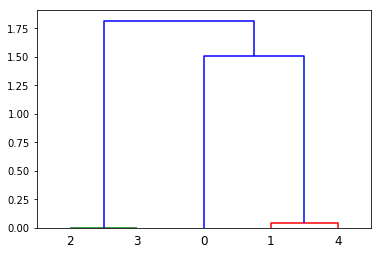

In [32]:
dendrogram(Z)

In [33]:
cluster_ID = fcluster(Z,1.0, criterion='distance')
cluster_ID

array([3, 2, 1, 1, 2], dtype=int32)

In [34]:
similar_docs['cluster'] = cluster_ID

In [35]:
def doc_length(values):
    a = []
    for i in values:
        a.append(len(i))
    return a

In [36]:
lengths_of_docs = doc_length(similar_docs.index.values)

In [37]:
similar_docs['length'] = lengths_of_docs

In [38]:
idx = similar_docs.groupby(['cluster'])['length'].transform(max) == similar_docs['length']

In [39]:
similar_docs[idx].index.values

array(['In a quarter when iPhone unit sales were of somewhat diminished importance Apple Inc beat earnings and revenue expectations and then delivered an upbeat view of what\x92s to come sending shares toward record highsThe company reported betterthanexpected results for its fiscal third quarter Tuesday posting earnings per share of 234 on revenue of 533 billion Analysts surveyed by FactSet had been projecting 216 in EPS and 523 billion in revenue Apple stock rose about 4 in afterhours trading to prices that would be record highs were they to occur during a regular trading sessionFor more on Apple earnings see our live blog recapThough Apple AAPL 020 \xa0once again fell short of Wall Street\x92s estimates for iPhone unit sales the company more than made up for that thanks to selling more of its premium iPhones Apple ended up with an iPhone average selling price of 724 in the June quarter which was far ahead of the 693 analysts were projecting The spring quarter typically brings the lo